In [1]:
import random

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
from sklearn.utils import check_random_state

rng = check_random_state(0)

# Training samples
X_train = rng.uniform(-50, 50, 100).reshape(50, 2)
y_train = X_train[:, 0]**2 - X_train[:, 1]**2 + X_train[:, 1]

# Test samples
X_test = rng.uniform(-50, 50, 100).reshape(50, 2)
y_test = X_test[:, 0]**2 - X_test[:, 1]**2 + X_test[:, 1]

In [3]:
from pycgp.evolution import evolution
from pycgp.mutation import single_mutation
from pycgp.gems import GemSM, MatchSMStrategy
from pycgp.counter import Counter
from pycgp.params import DEFAULT_PARAMS

In [4]:
from sklearn.metrics import mean_squared_error

ev_params = {
  'cost_func': mean_squared_error,
  'target_fitness': 0,
  'gems': True,
  'j_box_size': 50
}

TRIALS = 50

In [5]:
DEFAULT_PARAMS['n_rows'] = 1
DEFAULT_PARAMS['n_cols'] = 15
DEFAULT_PARAMS['n_inputs'] = 1
DEFAULT_PARAMS['n_outputs'] = 1

In [6]:
def print_evaluation(all_evals, all_bests, stats, scores):
    print('Number of improving gem applications: {}'.format(sum([x['g_better'] for x in stats])))
    print('Number of detoriorating gem applications: {}'.format(sum([x['g_worse'] for x in stats])))
    print('Number of same as parent applications: {}'.format(sum([x['g_same_as_parent'] for x in stats])))
    sum_of_gens = sum([x['gens'] for x in stats])
    print('Total generations: {}, avg: {}'.format(sum_of_gens, sum_of_gens/TRIALS))
    print('Average number of evaluations: {}\nAverage final fitness: {}'.format(
        np.average(all_evals), np.average([x.fitness for x in all_bests])))
    print('Average score on test: {}'.format(np.average(scores)))

In [7]:
%%time

random.seed(1)

ev_params['gems'] = False

all_evals = []
all_bests = []
stats = []
scores = []

print('iteration:', end=' ')
for i in range(0, TRIALS):
    result = evolution(DEFAULT_PARAMS, ev_params, X_train, y_train)
    all_evals.append(result['evals'])
    best_individual = result['final'][0]
    all_bests.append(best_individual)
    stats.append(Counter.get().dict.copy())
    
    output = best_individual.execute(X_test)
    score = mean_squared_error(output, y_test)
    scores.append(score)
    
    print('{},'.format(i), end=' ')
print('\n')

iteration: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 

CPU times: user 9min 32s, sys: 1.45 s, total: 9min 34s
Wall time: 9min 49s


Number of improving gem applications: 0
Number of detoriorating gem applications: 0
Number of same as parent applications: 0
Total generations: 122395, avg: 2447.9
Average number of evaluations: 5001.0
Average final fitness: 950218.5046475553
Average score on test: 915608.2794292651


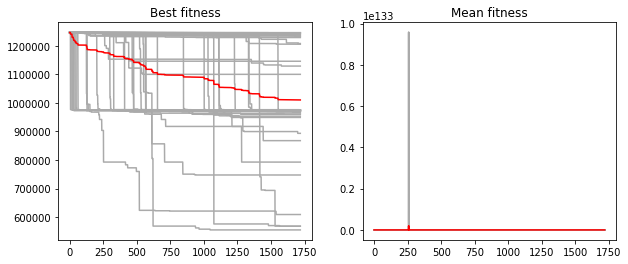

In [8]:
print_evaluation(all_evals, all_bests, stats, scores)

minn = min([len(x['best']) for x in stats])
best_data = np.array([x['best'][:minn] for x in stats])
best_avg = np.average(best_data, axis=0)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))

for run in best_data:
    ax1.plot(run, c='#aaaaaa')
ax1.plot(best_avg, c='#FF0000')
ax1.set_title('Best fitness')

minn = min([len(x['mean']) for x in stats])
mean_data = np.array([x['mean'][:minn] for x in stats])
mean_avg = np.average(mean_data, axis=0)

for run in mean_data:
    ax2.plot(run, c='#aaaaaa')
ax2.plot(mean_avg, c='#ff0000')
ax2.set_title('Mean fitness')




In [9]:
%%time

random.seed(1)

ev_params['gems'] = True

sm_all_evals = []
sm_all_bests = []
sm_stats = []
sm_scores = []

print('iteration:', end=' ')
for i in range(0, TRIALS):
    result = evolution(DEFAULT_PARAMS, ev_params, X_train, y_train)
    sm_all_evals.append(result['evals'])
    best_individual = result['final'][0]
    sm_all_bests.append(best_individual)
    sm_stats.append(Counter.get().dict.copy())
    
    output = best_individual.execute(X_test)
    score = mean_squared_error(output, y_test)
    sm_scores.append(score)
    
    print('{},'.format(i), end=' ')
print('\n')

iteration: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 

CPU times: user 9min 36s, sys: 1.59 s, total: 9min 38s
Wall time: 10min 11s


Number of improving gem applications: 30348
Number of detoriorating gem applications: 73277
Number of same as parent applications: 27373
Total generations: 76974, avg: 1539.48
Average number of evaluations: 5002.46
Average final fitness: 1001206.4359268956
Average score on test: 948500.2040439518


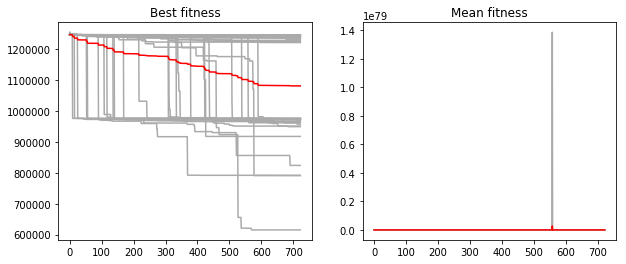

In [10]:
print_evaluation(sm_all_evals, sm_all_bests, sm_stats, sm_scores)

minn = min([len(x['best']) for x in sm_stats])
best_data = np.array([x['best'][:minn] for x in sm_stats])
sm_best_avg = np.average(best_data, axis=0)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))

for run in best_data:
    ax1.plot(range(0, minn), run, c='#aaaaaa')
ax1.plot(sm_best_avg, c='#FF0000')
ax1.set_title('Best fitness')

minn = min([len(x['mean']) for x in sm_stats])
mean_data = np.array([x['mean'][:minn] for x in sm_stats])
mean_avg = np.average(mean_data, axis=0)

for run in mean_data:
    ax2.plot(run, c='#aaaaaa')
ax2.plot(mean_avg, c='#ff0000')
ax2.set_title('Mean fitness')

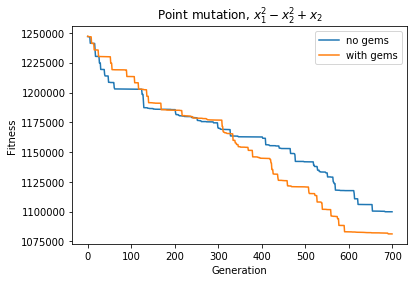

In [14]:
plt.plot(best_avg[:700], label='no gems')
plt.plot(sm_best_avg[:700], label='with gems')
plt.title('Point mutation, $x_1^2 - x_2^2 + x_2$')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.legend()
plt.savefig('out/pm2d.jpg')